In [1]:
#The code below imports all the required packages required for this analysis
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import datetime, date
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\user\Downloads\data_CaseStudy-analytics.csv") #Reads the case study csv file into a pandas dataframe.
df.info()  #This code was run to get a general overview of the dataset before cleaning. Output is displayed below.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350844 entries, 0 to 350843
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   date               350844 non-null  object 
 1   user_id            350844 non-null  int64  
 2   loan_id            350844 non-null  object 
 3   principal          350844 non-null  object 
 4   balance            350844 non-null  object 
 5   repaid             350844 non-null  float64
 6   days_late          133118 non-null  float64
 7   loan_status        350844 non-null  object 
 8   product_type       350844 non-null  object 
 9   reason             350844 non-null  object 
 10  approval_date      350844 non-null  object 
 11  last_payment_date  350844 non-null  object 
 12  default_date       350844 non-null  object 
 13  bank               350707 non-null  object 
 14  gender             350844 non-null  object 
 15  state              350491 non-null  object 
 16  da

In [3]:
df.sample(20) #To get a visual cue of the data and an overall feel of what the data looks like.

,date,user_id,loan_id,principal,balance,repaid,days_late,loan_status,product_type,reason,approval_date,last_payment_date,default_date,bank,gender,state,date_of_birth,employment_status
173399,22/03/2021,281758,b2399588-5118-4a52-a600-51227b28c7f4,"71,428.60","71,428.60",0.000000,NaN,On Time,SHORT,Business,7/3/2021,22/03/2021,20/06/2021,N,female,Y25,27/07/1973,SELF-EMPLOYED
261452,29/03/2021,1530019,33e381a6-6ad0-463b-8d55-93b589383118,"11,904.80","11,904.80",0.000000,NaN,On Time,SHORT,Business,21/03/2021,5/4/2021,4/7/2021,A,female,O15,8/9/1990,SELF-EMPLOYED
27944,5/4/2021,373590,ce4c6970-f5f3-4718-b983-6bdcb3c139bb,"71,428.60","71,428.60",4287.214286,18.0,Late,SHORT,Business,16/02/2021,18/03/2021,16/06/2021,G,female,Y25,31/12/1985,SELF-EMPLOYED
16080,15/03/2021,1439217,2d7bfc4f-39da-4bdc-923b-51c41769ed94,"21,428.60","21,428.60",0.000000,NaN,On Time,SHORT,Emergency,10/3/2021,24/03/2021,22/06/2021,D,female,FU,27/05/1994,SELF-EMPLOYED
194364,3/5/2021,160149,f59cf170-cb63-490c-8f7f-341c4dc8498d,"66,666.70","66,666.70",0.000000,NaN,On Time,SHORT,Personal/Confidential,20/04/2021,20/05/2021,18/08/2021,P,male,Y25,16/08/1993,SELF-EMPLOYED
133756,26/04/2021,1563475,92ec5b8e-8c5c-401b-82c9-636b667d50ca,"11,904.80","11,904.80",0.000000,NaN,On Time,SHORT,Medical fees,5/4/2021,30/04/2021,29/07/2021,G,male,S19,25/05/1982,SELF-EMPLOYED
153246,26/04/2021,1289563,e005e850-cd89-4a70-ba16-02e1a744b712,"7,142.90","7,142.90",0.000000,NaN,On Time,SCALING,Business,23/04/2021,8/5/2021,6/8/2021,D,male,DW,23/02/1980,EMPLOYED
168417,3/5/2021,1135106,a0d7567e-85ed-4d71-b0e2-aaf32d5b1e0c,"28,571.40","28,571.40",0.000000,34.0,Late,SHORT,Personal/Confidential,28/02/2021,30/03/2021,28/06/2021,D,female,BY,10/6/1981,EMPLOYED
136472,26/04/2021,10223,7597d94e-0f45-486c-806d-ea65cc68014c,"71,428.60","71,428.60",0.000000,NaN,On Time,SHORT,Household Goods,9/4/2021,8/5/2021,6/8/2021,B,male,Y25,25/05/1982,EMPLOYED
8212,15/03/2021,354526,85396f7f-4498-4028-bd3c-ccda22a972af,"35,714.30","35,714.30",0.000000,81.0,Late,SHORT,Business,9/12/2020,24/12/2020,24/03/2021,L,female,Y25,22/05/1988,SELF-EMPLOYED


## Data Cleaning

### Issues: 

1. All columns containing dates are in the wrong format. Needs to be converted.
2. User_id needs to be converted to a string(object) data type.
3. There are spaces in the principal and balance column headers.
4. Principal and balance columns are in the wrong format. To convert them to float data type, i need to also remove all string like characters from the columns, e.g ',' and '-'.
5. White space in the balance column needs to be converted to nan values.
6. The dataset contains a lot of snapshots of the same loan, with the same information duplicated. Only the latest snapshot for each loan is required for this analysis, others will be dropped. This will be done by using pandas.grouby the get the latest snapshot for each loan id and merging the resulting dataframe with the original to get a cleaned dataframe without irrelevant duplicates.


In [4]:
#The lines of code below converts the date columns in the data set into a datetime format, 
#equivalent of the date format in excel.
df_dates =  df[['date','approval_date','last_payment_date','default_date','date_of_birth']]
df[['date','approval_date','last_payment_date','default_date','date_of_birth']] = df_dates.apply(pd.to_datetime, errors = 'coerce')
#The code below is to convert the user_id column from a float to a string. 
#The user_id is unique in each observation and can not be added together like a float.
df['user_id'] = df['user_id'].astype('str')  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350844 entries, 0 to 350843
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   date               350844 non-null  datetime64[ns]
 1   user_id            350844 non-null  object        
 2   loan_id            350844 non-null  object        
 3   principal          350844 non-null  object        
 4   balance            350844 non-null  object        
 5   repaid             350844 non-null  float64       
 6   days_late          133118 non-null  float64       
 7   loan_status        350844 non-null  object        
 8   product_type       350844 non-null  object        
 9   reason             350844 non-null  object        
 10  approval_date      350844 non-null  datetime64[ns]
 11  last_payment_date  350844 non-null  datetime64[ns]
 12  default_date       350844 non-null  datetime64[ns]
 13  bank               350707 non-null  object  

In [5]:
# I noticed there were spaces in some of the column names , the rename function is used to remove those spaces

df.rename(columns = {'principal ':'principal', 'balance ':'balance'}, inplace = True)

In [6]:
#in order to convert principal and balance columns into a float from a string, 
#i need to replace all string like characters in each column. The code below does that.
df['principal'] = df['principal'].str.replace(",","")
df['balance'] = df['balance'].str.replace(",","")
df['balance'] = df['balance'].str.replace("-","")
df['balance'] = df['balance'].str.replace(" ", "")
df['principal'] = df['principal'].str.replace(" ", "")
#The code below replaces all white space with nan values in the balance column.
df['balance'] = df['balance'].replace(r'^\s*$', np.nan, regex=True)
#To test that the above code worked.
df[['principal','balance']].value_counts()

principal  balance 
11904.80   11904.80    60854
71428.60   71428.60    57523
7142.90    7142.90     35797
23809.50   23809.50    24572
14285.70   14285.70    20012
                       ...  
35714.30   17961.90        1
           18381.00        1
           18717.30        1
           18809.50        1
           19464.30        1
Length: 4562, dtype: int64

In [7]:
#Converts principal and balance columns to float data type
df[['principal','balance']] = df[['principal','balance']].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350844 entries, 0 to 350843
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   date               350844 non-null  datetime64[ns]
 1   user_id            350844 non-null  object        
 2   loan_id            350844 non-null  object        
 3   principal          350844 non-null  float64       
 4   balance            350700 non-null  float64       
 5   repaid             350844 non-null  float64       
 6   days_late          133118 non-null  float64       
 7   loan_status        350844 non-null  object        
 8   product_type       350844 non-null  object        
 9   reason             350844 non-null  object        
 10  approval_date      350844 non-null  datetime64[ns]
 11  last_payment_date  350844 non-null  datetime64[ns]
 12  default_date       350844 non-null  datetime64[ns]
 13  bank               350707 non-null  object  

In [8]:
#Pandas misread some of the days as months as vice versa, these were identified and the code below effects those changes
#replacing the wrong dates with the correct ones.
df.date = df.date.replace('2021-03-05 00:00:00', '2021-05-03 00:00:00')
df.date = df.date.replace('2021-12-04 00:00:00', '2021-04-12 00:00:00')
df.date = df.date.replace('2021-05-04 00:00:00', '2021-04-05 00:00:00')

In [9]:
df.sample(5) #To test that the above code worked

,date,user_id,loan_id,principal,balance,repaid,days_late,loan_status,product_type,reason,approval_date,last_payment_date,default_date,bank,gender,state,date_of_birth,employment_status
15471,2021-04-05,377381,5c0c1781-0f02-4e5b-ba9d-1600fb35fd07,28571.4,22761.9,16666.66667,88.0,Late,SHORT,Business,2020-12-23,2021-07-01,2021-07-04,G,female,H8,1995-07-17,SELF-EMPLOYED
222010,2021-03-22,1123392,37a01771-8e01-4a0d-a1b3-15ffd07a7454,33333.3,9632.3,37367.69048,55.0,Late,SHORT,Business,2021-11-01,2021-01-26,2021-04-26,G,female,K11,1997-12-22,SELF-EMPLOYED
318704,2021-04-19,153871,6bb2d91d-4bf3-4f43-8abb-20e2aea37899,47619.0,47619.0,0.00000,21.0,Late,SHORT,Business,2021-02-27,2021-03-29,2021-06-27,O,male,Y25,1990-12-28,SELF-EMPLOYED
202347,2021-05-03,752685,33f84f85-23c0-4d79-81c7-61f6686fbbc4,71428.6,71428.6,0.00000,NaN,On Time,SHORT,Business,2021-04-26,2021-05-15,2021-08-13,O,female,Y25,1986-04-23,EMPLOYED
34085,2021-04-05,135507,dd4eb9a2-d6af-47b5-b730-950a8f24407c,64285.7,64285.7,0.00000,1.0,Late,SHORT,Business,2021-05-03,2021-04-04,2021-03-07,O,male,Y25,1989-02-05,EMPLOYED


In [10]:
#The code below isolated the loan id's and their latest snapshot dates, 
#this will be merged via a left join with the main dataset to obtain only the latest snapshots for each loan id and user id.
df_group_loan_id = df.groupby('loan_id').date.max() #Returns the latest date for each loan_id
df_group_loan_id = df_group_loan_id.to_frame()
df_group_loan_id.reset_index(inplace = True)
df_group_loan_id.head(10)

,loan_id,date
0,00010fd1-129d-4e7e-b69a-1c1bee484340,2021-05-03
1,00026405-3262-4919-a192-3bb2144f010c,2021-05-03
2,0003415d-06c1-49d0-8166-e84511d4e172,2021-05-03
3,00036d18-af5d-466d-ab22-19b2204ea85a,2021-04-19
4,0003c745-72c4-4258-90cd-c871cfa3822b,2021-03-15
5,00053a6d-f843-4094-abfa-46009f5c32d8,2021-04-12
6,00067918-f76c-4bc4-9037-5b6c22af8eac,2021-05-03
7,0007119c-c3f1-4a05-b689-f4ade14af3c0,2021-04-05
8,00074c94-9a15-4978-9aa2-06d9d9d836f1,2021-04-05
9,0007d3f1-8101-45d3-b3a9-1810c63d834a,2021-04-19


In [11]:
#code below merges the dataframe above with the original dataset via a 
#left join to obtain the full dataset of latest snapshotsof each loan id
df_cleaned = pd.merge(df_group_loan_id, df, on = ['loan_id', 'date'], how ='left')
df_cleaned.sample(10)

,loan_id,date,user_id,principal,balance,repaid,days_late,loan_status,product_type,reason,approval_date,last_payment_date,default_date,bank,gender,state,date_of_birth,employment_status
18850,2bee2613-0afe-49b3-8e12-68d5a0cb036b,2021-04-12,1210797,28571.4,28571.4,0.0,NaN,On Time,SHORT,Business,2021-02-04,2021-04-17,2021-07-16,O,male,A1,1987-04-24,SELF-EMPLOYED
6188,0e637c46-a100-4c8a-9883-f661e74283e1,2021-05-03,351247,59523.8,59523.8,0.0,NaN,On Time,SHORT,Emergency,2021-04-27,2021-05-27,2021-08-25,K,male,CX,1992-11-16,SELF-EMPLOYED
95770,e1ab23c4-40c3-4ddc-b3e0-c855d5114ce2,2021-05-03,148245,11904.8,11904.8,0.0,12.0,Late,SHORT,Medical fees,2021-03-22,2021-04-21,2021-07-20,O,male,HS,1991-05-22,SELF-EMPLOYED
18303,2ab16d6b-b12c-467b-acfb-448c1cf42928,2021-03-15,1254790,7142.9,7142.9,0.0,86.0,Late,SCALING,Transportation/Travel,2020-11-19,2020-12-19,2021-03-19,S,male,K11,1979-02-08,EMPLOYED
50287,75f5039c-8c65-4f13-97fd-887fb2dc5d37,2021-03-22,1300181,54761.9,54761.9,0.0,NaN,On Time,SHORT,Business,2021-12-03,2021-03-26,2021-06-24,B,female,BY,1989-12-06,SELF-EMPLOYED
19242,2ced6677-8379-48dc-b0f1-578642f72406,2021-05-03,574644,42857.1,42857.1,0.0,2.0,Late,SHORT,Education,2021-04-16,2021-01-05,2021-07-30,S,male,G7,1978-02-10,SELF-EMPLOYED
24757,3a122a26-2409-4274-b43a-cdf0f95957cf,2021-05-03,1473574,8928.6,8928.6,0.0,3.0,Late,SCALING,Household Goods,2021-04-15,2021-04-30,2021-07-29,G,male,B2,1976-08-06,EMPLOYED
10587,18a06f34-cd3f-4f8e-9af6-0e8992eba4f7,2021-05-03,831861,71428.6,71428.6,0.0,4.0,Late,SHORT,Medical fees,2021-03-30,2021-04-29,2021-07-28,G,female,GT,1980-04-21,EMPLOYED
66558,9c92dbc7-a257-4118-b962-9d41bb1aaae9,2021-05-03,1291982,59523.8,59523.8,0.0,NaN,On Time,SHORT,Business,2021-04-15,2021-05-15,2021-08-13,A,female,BY,1978-10-11,SELF-EMPLOYED
37283,5752c4a2-e62b-4b3d-bb71-1bde08ae37d8,2021-04-05,595496,23809.5,23809.5,0.0,87.0,Late,SHORT,Household Goods,2020-09-12,2021-08-01,2021-08-04,G,female,Y25,1989-08-04,EMPLOYED


# Exploratory Data Analysis

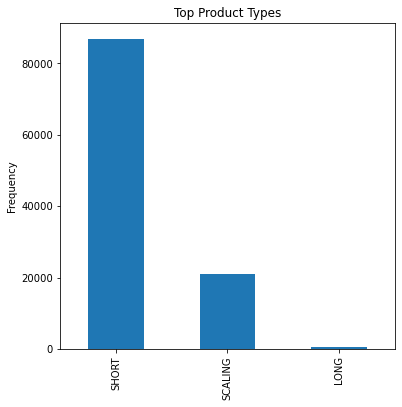

In [12]:
#I want to know the most popular product types. The code below lists the values in the product type columns and their frequency
#and finally plotting it on a bar chart.
df_product = df_cleaned.product_type.value_counts()
df_product.plot(kind = 'bar', title = 'Top Product Types', figsize = (6,6));
plt.ylabel('Frequency');

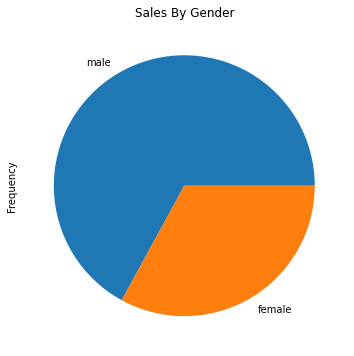

In [13]:
#The code below generates the number of male and female customers and plots it on a pie chart
df_gender = df_cleaned.gender.value_counts()
df_gender.plot(kind = 'pie', title = 'Sales By Gender', figsize = (6,6));
plt.ylabel('Frequency');

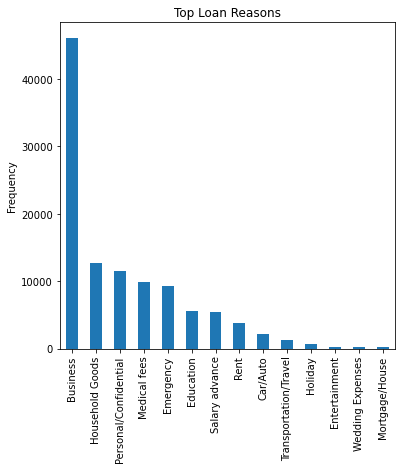

In [14]:
#Its interesting to see which reason was the most popular for applying for a loan. Most customers apply for loans for business.
df_reason = df_cleaned.reason.value_counts()
df_reason.plot(kind = 'bar', title = 'Top Loan Reasons', figsize = (6,6));
plt.ylabel('Frequency');

In [15]:
#The code below tries to get the total number of users that applied for loans based on this dataset -Almost 60,000 users
df_cleaned.user_id.nunique()

59988

In [16]:
#The number of unique loans applied for by customers - 108,752 loans
df_cleaned.loan_id.nunique()

108752

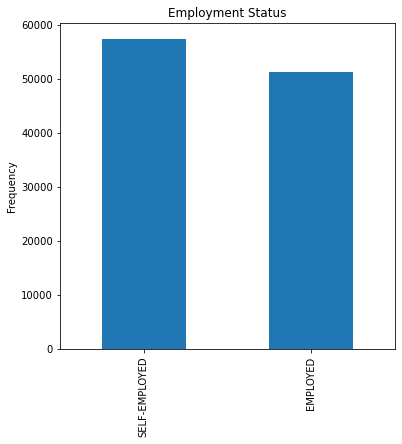

In [24]:
#A higher number of customers run their own business
df_employment = df_cleaned.employment_status.value_counts()
df_employment.plot(kind = 'bar', title = 'Employment Status', figsize = (6,6));
plt.ylabel('Frequency');

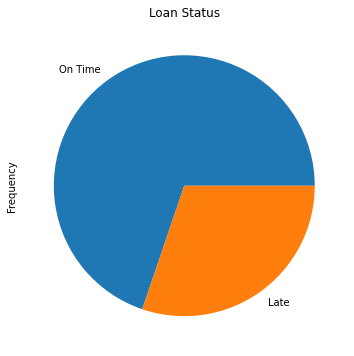

In [25]:
#We have less late loans that loan that are on time
df_loan_status = df_cleaned.loan_status.value_counts()
df_loan_status.plot(kind = 'pie', title = 'Loan Status', figsize = (6,6));
plt.ylabel('Frequency');

In [19]:
#I would like to know the average age of our customers. First, i created a function that calculates age
#from a given date and then applied the function to a new column named 'age' using the date_of_birth column.
def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

df_cleaned['age'] = df_cleaned['date_of_birth'].apply(calculate_age)

In [20]:
df_cleaned.sample(10)

,loan_id,date,user_id,principal,balance,repaid,days_late,loan_status,product_type,reason,approval_date,last_payment_date,default_date,bank,gender,state,date_of_birth,employment_status,age
84531,c71b3548-fbf4-47cd-af28-5cacb9938c93,2021-04-26,1537047,10714.3,10714.3,0.0,NaN,On Time,SCALING,Personal/Confidential,2021-04-21,2021-06-05,2021-04-08,N,male,Y25,1976-03-23,EMPLOYED,46.0
53094,7c7e01fa-c99e-4b04-8b8a-9fd9ca7b18cd,2021-05-03,1595870,11904.8,11904.8,0.0,NaN,On Time,SHORT,Education,2021-04-20,2021-05-20,2021-08-18,D,female,D4,1999-03-13,SELF-EMPLOYED,23.0
77649,b6e0dd95-8bc0-4590-8067-068eb60df38c,2021-05-03,582268,23809.5,23809.5,0.0,NaN,On Time,SHORT,Business,2021-09-04,2021-09-05,2021-07-08,D,male,FU,1979-06-22,SELF-EMPLOYED,43.0
64879,9896a2b2-eed8-48ec-a4b6-b48de4a6c8eb,2021-03-22,1384445,35714.3,35714.3,0.0,NaN,On Time,SHORT,Business,2021-11-03,2021-10-04,2021-09-07,F,male,B2,1988-05-02,SELF-EMPLOYED,34.0
80730,be36dace-974d-4f30-a9ce-c32fcaa82159,2021-03-29,1522281,11904.8,11904.8,0.0,NaN,On Time,SHORT,Business,2021-03-18,2021-02-04,2021-01-07,L,male,L12,1979-01-01,SELF-EMPLOYED,43.0
72399,aa6e39e0-7bf0-41fd-b6bd-7837df3f2148,2021-05-03,846288,71428.6,71428.6,0.0,21.0,Late,SHORT,Business,2021-03-13,2021-12-04,2021-11-07,G,male,Y25,1992-01-26,SELF-EMPLOYED,30.0
80225,bcfa566d-19da-4027-b9a9-e828089d1e86,2021-03-15,62703,11904.8,11904.8,0.0,NaN,On Time,SHORT,Emergency,2021-03-03,2021-03-18,2021-06-16,G,male,Y25,1990-05-15,SELF-EMPLOYED,32.0
72307,aa303390-815e-404a-9d96-f26e6437a229,2021-05-03,340384,71428.6,71428.6,0.0,NaN,On Time,SCALING,Medical fees,2021-09-04,2021-09-05,2021-07-08,F,male,T20,1989-02-02,EMPLOYED,33.0
35523,533965b0-3730-41d1-8799-91cbe0e01492,2021-04-26,1592008,11904.8,11904.8,0.0,NaN,On Time,SHORT,Business,2021-04-19,2021-04-05,2021-02-08,S,male,EV,1984-03-23,SELF-EMPLOYED,38.0
25076,3ad18d23-deff-4fde-962c-d4cba03f099e,2021-05-03,381543,71428.6,71428.6,0.0,NaN,On Time,SHORT,Household Goods,2021-04-22,2021-05-22,2021-08-20,G,female,B2,1976-03-19,SELF-EMPLOYED,46.0


In [21]:
df_cleaned['age'].describe() #Median age of customers is 35, while the average age is 36.

count    108751.000000
mean         36.187658
std           9.204653
min          18.000000
25%          30.000000
50%          35.000000
75%          41.000000
max         122.000000
Name: age, dtype: float64

In [22]:
#finally, i would like to calculate PAR7 AND PAR 30, to understand the level of risk we are dealing with currently 
#on our loan portfolio. I calculated the total values in the balance column, 
#and divided it by loans that are 30 or more days over_due. 
#this was determined using the days_late column
total_loan_portfolio = df_cleaned.balance.sum()
loan_overdue_over30days = df_cleaned.loc[df_cleaned.days_late >= 30]
loan_overdue_over30days = loan_overdue_over30days.balance
total_loan_overdue_over30days = loan_overdue_over30days.sum()

par30 =  (total_loan_overdue_over30days/total_loan_portfolio)*100
par30    #Par30 appears to be at 13.79%.

13.785624188825969

In [23]:
#I calculated the total values in the balance column, 
#and divided it by loans that are 7 or more days over_due. 
#this was determined using the days_late column
total_loan_portfolio = df_cleaned.balance.sum()
loan_overdue_over7days = df_cleaned.loc[df_cleaned.days_late >= 7]
loan_overdue_over7days = loan_overdue_over7days.balance
total_loan_overdue_over7days = loan_overdue_over7days.sum()

par7 =  (total_loan_overdue_over7days/total_loan_portfolio)*100
par7 #par7 appears to be at 20.19%.

20.190506345828585